# Visualizing Bristlecone Pine Treering Data

The 'treering' dataset from `pydataset` contains normalized tree-ring widths in dimensionless units on a yearly basis from -6000 to 1979 for bristlecone pines found in Methuselah Walk, California.  This data is visualized herein as a trunk cross-section.  Lighter colors indicate larger yearly tree-rings and darker colors indicate smaller yearly tree-rings as a proportion of the maximum.

In [47]:
from pydataset import data

# Load the treering dataset and examine contents
df = data('treering')
# data('treering', show_doc=True) # Additional documentation on the data
# display(df.head())

# Calculate the cumulative sum of the treerings to get the total radius of the tree in that year
df['total_width'] = df.treering.cumsum()
display(df.head())

,time,treering,total_width
1,-6000,1.345,1.345
2,-5999,1.077,2.422
3,-5998,1.545,3.967
4,-5997,1.319,5.286
5,-5996,1.413,6.699


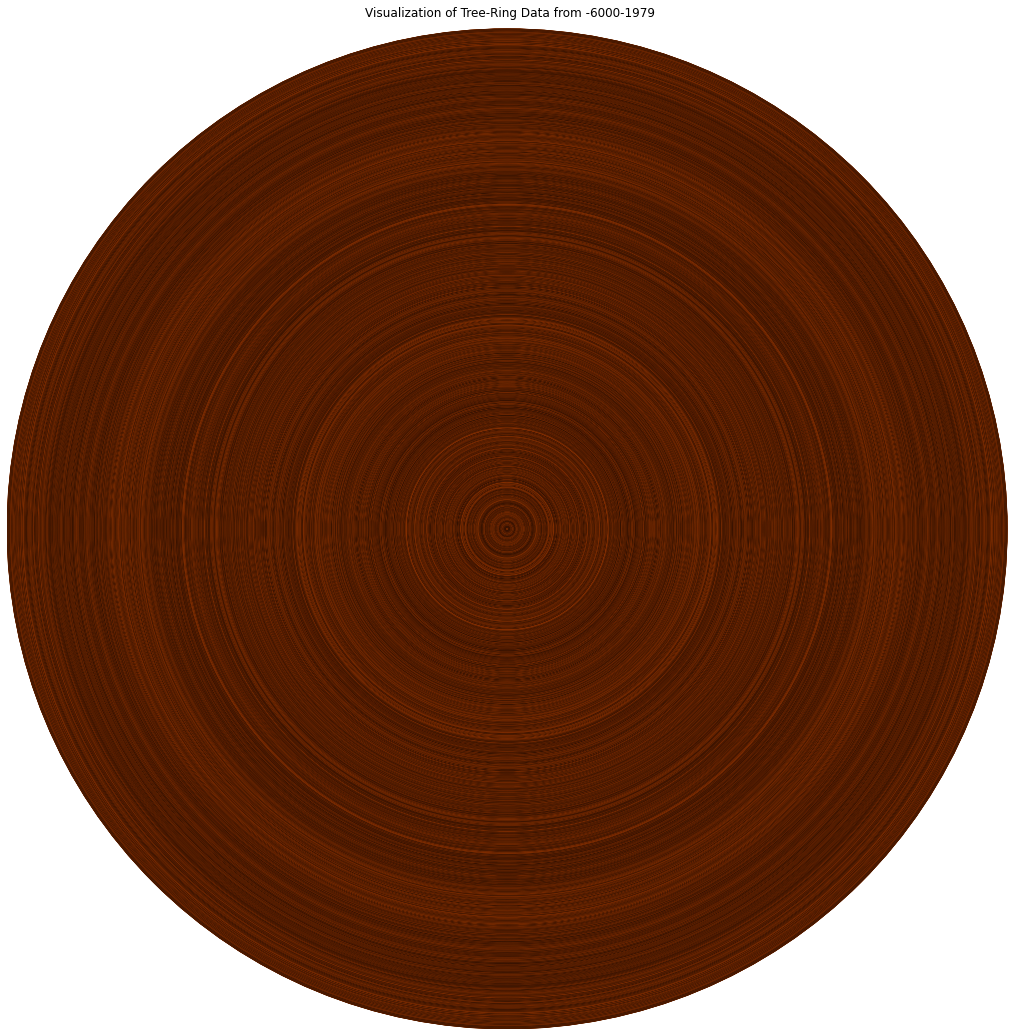

In [49]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import colorsys
import math

# Setting base color for circles
color = (0.64, 0.23, 0) # Color in rgb
color = colorsys.rgb_to_hls(color[0], color[1], color[2]) # Color in hls
# Max treering size to use in scaling the color
M = df.treering.max()

# Calculate center of circles
center = (math.floor(df.iloc[7979][2]/2), math.floor(df.iloc[7979][2]/2))

# Create the figure and configure the view
fig, ax = plt.subplots()
ax.set_xlim(0,8000)
ax.set_ylim(0,8000)
fig.set_size_inches(18.5, 18.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')
plt.title('Visualization of Tree-Ring Data from -6000-1979')

# For each entry, draw a circle
for i in range(7979, -1, -1):
    # Adjust the color so smaller rings are darker (as in reality smaller rings are denser and therefore darker)
    c = colorsys.hls_to_rgb(color[0], (df.iloc[i][1]/M)*color[1], color[2])
    # Add the circle with radius from the cumsum column (divided by 2 to keep things from getting too large to view)
    ax.add_patch(Circle(center, df.iloc[i][2]/2, color=c))

# And display the figure
plt.show()